# Predict CO2 emissions from a chosen sector(s)

There are many factors that contribute to the yearly CO2 emissions such as industries,  farming, fires, population, etc. 

Our interest lies in sectors rather than their individual components, and their effect on the emissions. Which sector has the highest relationship with the CO2 emissions ? And If so can we use this relationship to create a regression.
 
For our project we have chosen to predict CO2 emissions from a chosen sector. We want to find the regression line that accurately predicts the CO2 emissions. 

The independent variables that we pick are going to be selected via using the correlation matrix

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from pandas import DataFrame as f
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold

In [2]:
#load the datset
df=pd.read_csv("C:/Users/Dell/Downloads/Mini Project 1/Agrofood_co2_emission.csv")

In [3]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
#calculating the number of NaN/Missing values in each column
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
#Dropping the NaN values from our dataframe
df.dropna(inplace = True)

In [7]:
df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

All null values eliminated 

In [8]:
#new size of our dataframe
df.shape

(4546, 31)

# Standardising the dataset

In [9]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns for standardization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
31,Albania,-1.726948,-0.254187,-0.302859,-0.280851,-0.258139,-0.266363,-0.279521,-0.393830,0.262092,...,-0.271098,-0.066139,-0.250132,-0.251950,-0.222383,-0.294861,-0.259266,-0.268173,-0.305839,-0.304279
32,Albania,-1.614066,-0.254187,-0.302859,-0.287677,-0.258937,-0.266363,-0.279521,-0.393684,0.262092,...,-0.271709,-0.066139,-0.250132,-0.260678,-0.222499,-0.294777,-0.259285,-0.268074,-0.297849,-2.366756
33,Albania,-1.501184,-0.254187,-0.302859,-0.288052,-0.259140,-0.266363,-0.279521,-0.394783,0.262092,...,-0.273461,-0.066139,-0.250132,-0.262903,-0.222864,-0.294715,-0.259334,-0.268003,-0.299512,-1.023498
34,Albania,-1.388302,-0.254187,-0.302859,-0.284582,-0.259176,-0.266363,-0.279521,-0.392247,0.262092,...,-0.270362,-0.066139,-0.250132,-0.265423,-0.223318,-0.294733,-0.259410,-0.267958,-0.299165,-1.105755
35,Albania,-1.275421,-0.254187,-0.302859,-0.284983,-0.259227,-0.266363,-0.278948,-0.390061,0.262092,...,-0.255077,-0.066139,-0.250132,-0.267638,-0.223757,-0.294746,-0.259504,-0.267935,-0.298269,0.500068


# Using Correlation Matrix For our feature selection 

<AxesSubplot:>

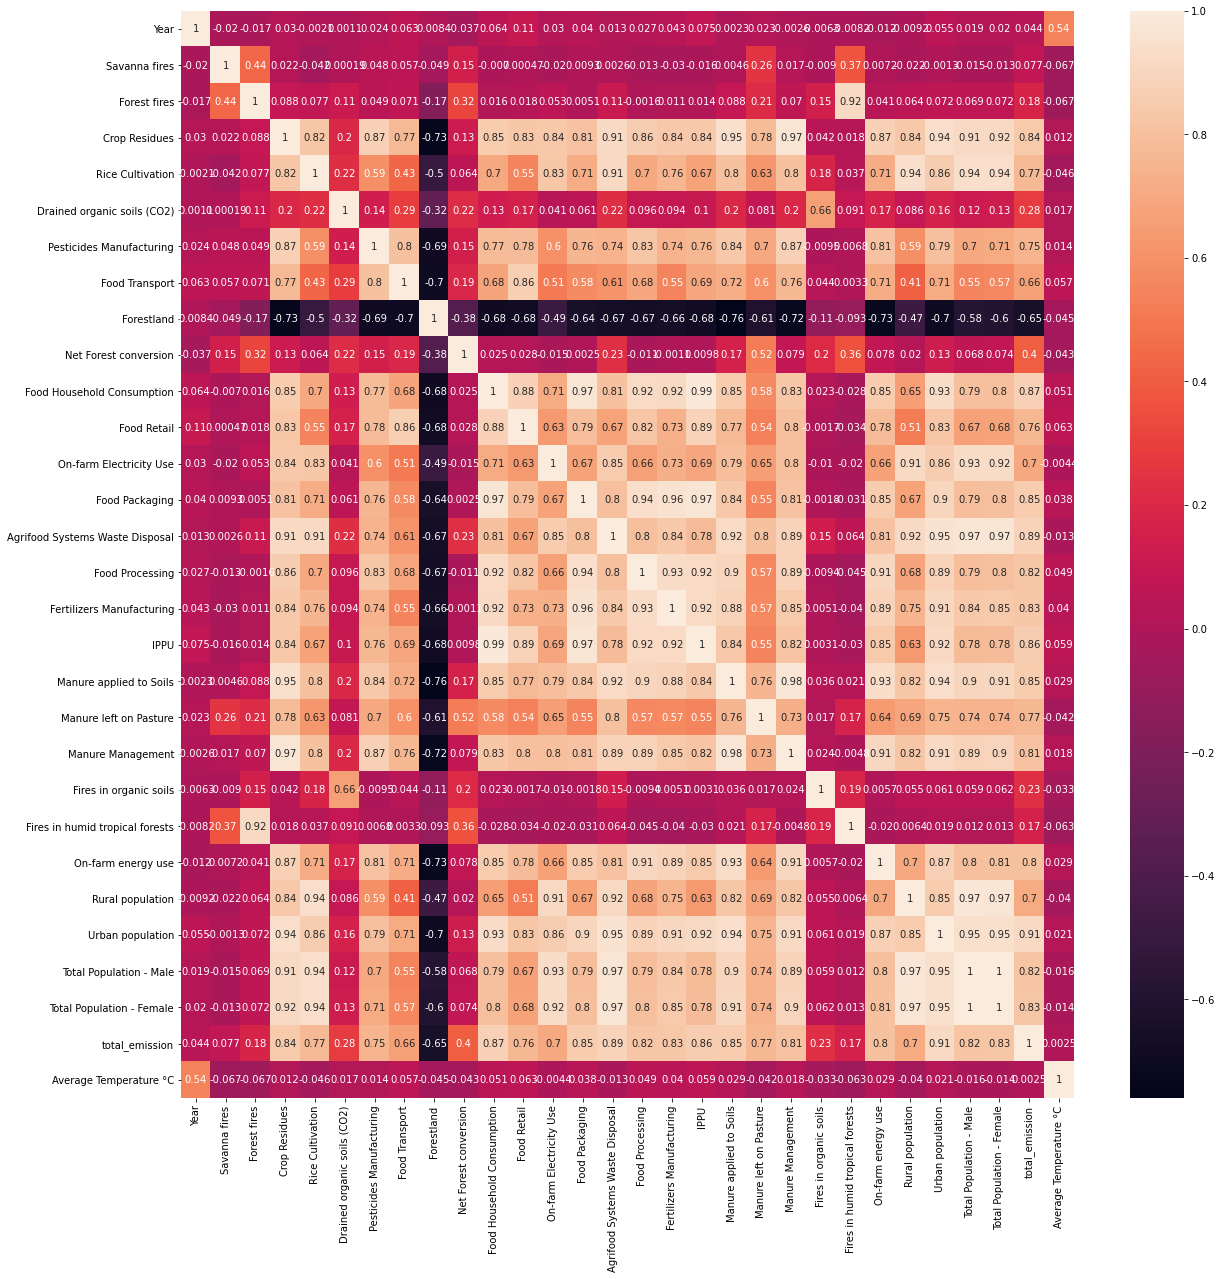

In [10]:
corrmatrix= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmatrix,annot=True)

We have eliminated population(Rural population, Urban population, Total Population - Male ,Total Population - Female ) as population already has a very high correlation (approx~ 0.95-1) and it is known that higher population creates higher amount of CO2 emissions. We thought it would skew results and our focus is on the sectors rather than the population.

Creating a new dataframe 'df_sectors_total_emission' that contains the 'Year' and the 'total_emissions '
Using the sectors, year as different features and 'total_emissions' as the target column.
We added up the features in each sector respectively reducing the feature column size and making it far more compact and easier to work with.

In [11]:
#Sectioning our dataset into different sectors
sectors = {
    'Agriculture': ['Savanna fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
                    'Pesticides Manufacturing', 'Food Transport', 'On-farm Electricity Use', 'Food Packaging',
                    'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
                    'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils'],

    'Forest_Land_Use': ['Forest fires', 'Forestland', 'Net Forest conversion', 'Fires in humid tropical forests'],

    'Industrial': ['IPPU', 'On-farm energy use'],

}

# Create a new DataFrame to store total emissions for each sector
df_sectors_total_emission = pd.DataFrame()

# Calculate total emissions for each sector
for sector, features in sectors.items():
    df_sectors_total_emission[sector] = df[features].sum(axis=1)

# Add the 'Year' column to the new DataFrame
df_sectors_total_emission['Year'] = df['Year']
df_sectors_total_emission['total_emission'] = df['total_emission']

df_sectors_total_emission

,Agriculture,Forest_Land_Use,Industrial,Year,total_emission
31,-3.856559,-0.474013,-0.450088,-1.726948,-0.305839
32,-3.689550,-0.474013,-0.459884,-1.614066,-0.297849
33,-3.695452,-0.474013,-0.465053,-1.501184,-0.299512
34,-3.680383,-0.474013,-0.467444,-1.388302,-0.299165
35,-3.635569,-0.474013,-0.470055,-1.275421,-0.298269
...,...,...,...,...,...
6960,-3.212865,0.469304,-0.442684,1.207979,0.038476
6961,-3.277587,0.442546,-0.443779,1.320861,0.033650
6962,-3.244638,0.466431,-0.438492,1.433743,0.035495
6963,-3.156331,0.453076,-0.440144,1.546625,0.040277


<AxesSubplot:>

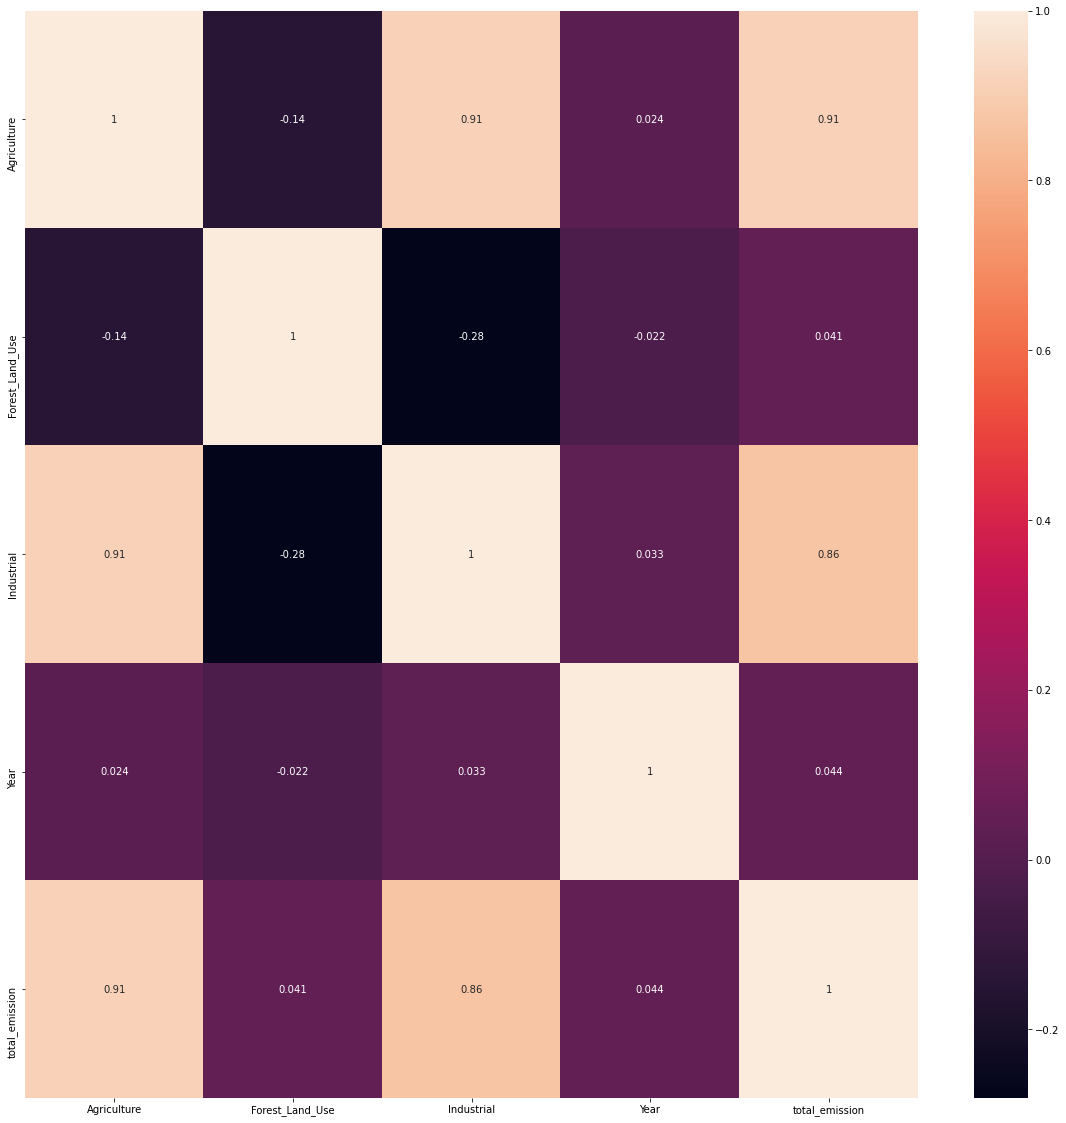

In [12]:
corrmatrix= df_sectors_total_emission.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmatrix,annot=True)


'Agriculture' has the highest correlation(0.92) with the 'total_emissions' feature column and 
'Industrial' has second highest correlation (0.87) so we are going to select these columns for our regression.

We chose to do this sector wise rather than take the original columns from the feature columns as we wanted to view it as a sector rather than its individual components that contribute to CO2 emissions.

We can use the below text for the X and y if we want a more holistic view of the CO2 emissions.


X=df[['Savanna fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
                    'Pesticides Manufacturing', 'Food Transport', 'On-farm Electricity Use', 'Food Packaging',
                    'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
                    'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils']]

y= df[['total_emission]]


In [13]:
X = df_sectors_total_emission[['Agriculture','Industrial']]
y = df_sectors_total_emission[['total_emission']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X.shape)
print(y.shape)

(4546, 2)
(4546, 1)


# Model Selection Using KFold and Algorithm Comparision 

In [16]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('LAS',Lasso()))
models.append(('RDG',Ridge()))
results=[]
names=[]

In [17]:
models

[('LR', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('DT', DecisionTreeRegressor()),
 ('LAS', Lasso()),
 ('RDG', Ridge())]

Using KFold using number of splits to be 10, we loop through the models list calculating the cross validation for each model and appending the results to the 'results' list.

the scoring technique used was negative mean squared error(MSE) so to calculate the average mean we must turn the negative sign to positive then calculate the mean of the MSE.  

In [18]:
scoring='neg_mean_squared_error'
kfold=KFold(n_splits=10)
for name,model in models:
 cv_results=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
 results.append(cv_results)
 names.append(name)
 print(cv_results)
 mse_scores = -cv_results  # Convert negative MSE scores to positive
 mean_mse = np.mean(mse_scores)
 mean_mse_results=[]
 mean_mse_results.append((name,mean_mse))
 print(f"{name}: Mean MSE: {mean_mse:.4f}")

[-0.02310528 -0.76954696 -0.3034805  -0.0086202  -0.21696114 -0.01049686
 -0.01886169 -0.31926806 -0.00456011 -0.23039946]
LR: Mean MSE: 0.1905
[-0.36550543 -0.80158478 -0.02835046 -0.06582237 -0.26622532 -0.01434172
 -0.02480453 -1.84930884 -0.00701268 -0.06329545]
KNN: Mean MSE: 0.3486
[-0.25133665 -0.83024487 -0.06145217 -0.13221406 -0.54768983 -0.01704117
 -0.04351711 -1.88974962 -0.01654869 -0.08858475]
DT: Mean MSE: 0.3878
[-0.03060569 -0.97972725 -0.49524473 -0.00798337 -0.13673598 -0.01298138
 -0.01719527 -0.28704751 -0.0062904  -0.12604578]
LAS: Mean MSE: 0.2100
[-0.02310969 -0.76954745 -0.30348017 -0.00862031 -0.21685832 -0.01049717
 -0.0188606  -0.31926565 -0.00456058 -0.23038175]
RDG: Mean MSE: 0.1905


To get the best model from our KFold analysis we take the minimum value of the mean MSE.

We get RIDGE as the best regression model for our analysis.

In [19]:
best_model = min(mean_mse_results)
best_model

('RDG', 0.190518166853113)

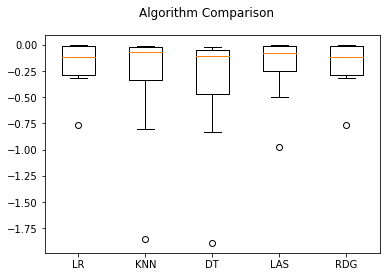

In [20]:
fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()

# RIDGE Regression model :

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge_model=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge_model,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 100}
-0.1875796383749813


In [22]:
# Initialize and train a Ridge regression model
alpha = 100  # Regularization strength
ridge_model = Ridge(alpha=alpha)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.10765439252980487
R-squared: 0.8495164070577415


In [25]:
# Print coefficients (weights) of the model
print('Ridge Coefficients:', ridge_model.coef_)

Ridge Coefficients: [[0.06766782 0.0915386 ]]


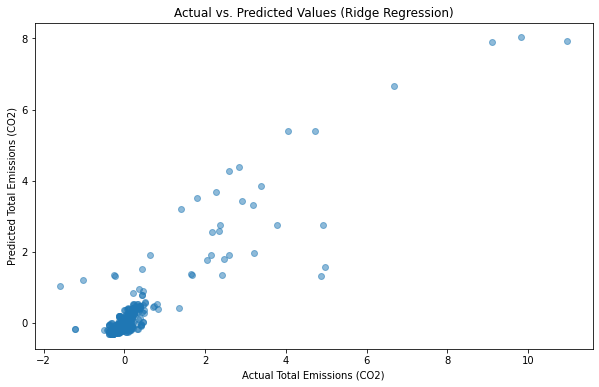

In [26]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Total Emissions (CO2)')
plt.ylabel('Predicted Total Emissions (CO2)')
plt.show()

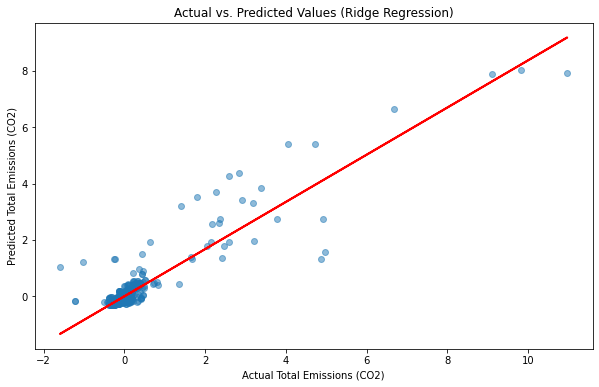

In [27]:
# Flatten y_test if it's a 2D array
y_test_flat = np.ravel(y_test)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Actual Total Emissions (CO2)')
plt.ylabel('Predicted Total Emissions (CO2)')

# Add regression line
slope, intercept = np.polyfit(y_test_flat, y_pred, 1)
plt.plot(y_test_flat, slope * y_test_flat + intercept, color='red', linewidth=2)

plt.show()

In [28]:
X_test

,Agriculture,Industrial
729,-3.757913,-0.473382
5841,-3.216090,-0.476418
54,-3.806152,-0.448882
2775,-3.614252,-0.466235
290,-3.940084,-0.464079
...,...,...
5840,-3.216199,-0.476871
3021,-0.573646,0.534276
6709,-1.397885,-0.317649
635,-3.622744,-0.474453


In [29]:
y_test

,total_emission
729,-0.303788
5841,-0.217300
54,-0.304296
2775,-0.277117
290,-0.307602
...,...
5840,-0.217483
3021,-0.099094
6709,-0.152904
635,-0.272224
